In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import AllChem as Chem 
from rdkit.Chem.Draw import IPythonConsole

In [2]:
sm1 = 'Cc1cn2c(CN(C)C(=O)c3ccc(F)cc3C)c(C)nc2s1'
sm2 = 'Cc1cc(F)ccc1C(=O)N(C)Cc1c(C)nc2scc(C)n12'

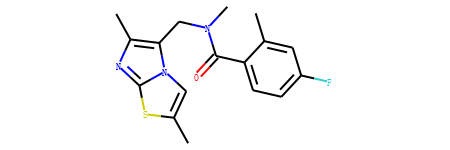

In [3]:
m1 = Chem.MolFromSmiles(sm1) # 6 N
m1

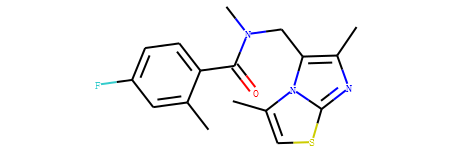

In [4]:
m2 = Chem.MolFromSmiles(sm2) # 10 N
m2

In [108]:
def atom_charges(m):
    Chem.EmbedMolecule(m)
    Chem.MMFFOptimizeMolecule(m)
    pyMP = Chem.MMFFGetMoleculeProperties(m)
    atom_count = len(m.GetAtoms())
    cvals = [pyMP.GetMMFFPartialCharge(i) for i in range(atom_count)]
    return cvals

In [26]:
#输出每个分子的坐标
def atom_pos(m):
    mol = Chem.AddHs(m)
    Chem.EmbedMolecule(mol, Chem.ETKDG())
    ff = Chem.UFFGetMoleculeForceField(mol)
    ff.Initialize()
    ff.Minimize()
    cf = mol.GetConformer()
    co = cf.GetPositions()
    return co

In [63]:
#计算index=i的原子的特征矩阵,p为空间距离矩阵，m为分子，输出单位向量
def atom_vec(i,p,m):
    a = m.GetAtomWithIdx(i)
    v =np.array([0,0,0])
    for j in a.GetNeighbors():
        v = v + p[j.GetIdx()] - p[i]
    return v/np.linalg.norm(v)

In [99]:
atom_scalar = np.array(range(-128,129,2))/16
atom_scalar =  np.append(atom_scalar[:64], atom_scalar[-64:])
#给出jndex=i 距离矩阵为p的分子m的i原子采样矩阵
def dot_vec(i,p,m):
    v = atom_vec(i,p,m)
    vec = np.zeros((128,3))
    for n,m in enumerate(atom_scalar):
        vec[n] = m*v + p[0]
    return vec

In [29]:
p = atom_pos(m2)

In [64]:
atom_vec(0,p,m2)

array([ 0.22737604, -0.97367438, -0.01607319])

In [104]:
for a in m2.GetAtoms():
    v = atom_vec(a.GetIdx(),p,m2)
    print(v,a.GetSymbol())
    print([s.GetSymbol() for s in a.GetNeighbors()])

[ 0.22737604 -0.97367438 -0.01607319] C
['C']
[0.39907103 0.8976541  0.1869744 ] C
['C', 'C', 'C']
[-0.39378163 -0.62711286 -0.67206063] C
['C', 'C']
[-0.45270831  0.4018295  -0.79598256] C
['C', 'F', 'C']
[-0.6836296   0.31928497 -0.65628323] F
['C']
[-0.30238055  0.95308441  0.01400375] C
['C', 'C']
[0.37389083 0.64346383 0.66795205] C
['C', 'C']
[-0.69644576 -0.40232598 -0.59421975] C
['C', 'C', 'C']
[ 0.04622174 -0.07091091  0.99641116] C
['C', 'O', 'N']
[-0.14603822  0.17679832  0.97335255] O
['C']
[-0.8254356   0.25862158 -0.50176783] N
['C', 'C', 'C']
[ 0.52813911 -0.53929245  0.65592128] C
['N']
[-0.47794431 -0.32680408 -0.81533326] C
['N', 'C']
[-0.6813216  -0.65185042 -0.33300437] C
['C', 'C', 'N']
[-0.71373119  0.64549487 -0.27188998] C
['C', 'C', 'N']
[-0.69416744  0.63530064  0.33841492] C
['C']
[0.46501302 0.8551929  0.22892792] N
['C', 'C']
[-0.56248849  0.76824118  0.30563409] C
['N', 'S', 'N']
[0.8728893  0.48588336 0.04451539] S
['C', 'C']
[ 0.50002969 -0.79718562 -0.

In [76]:
atom_scalar = np.array(range(-128,129,2))/16
atom_scalar =  np.append(atom_scalar[:64], atom_scalar[-64:])
len(atom_scalar),atom_scalar

(128, array([-8.   , -7.875, -7.75 , -7.625, -7.5  , -7.375, -7.25 , -7.125,
        -7.   , -6.875, -6.75 , -6.625, -6.5  , -6.375, -6.25 , -6.125,
        -6.   , -5.875, -5.75 , -5.625, -5.5  , -5.375, -5.25 , -5.125,
        -5.   , -4.875, -4.75 , -4.625, -4.5  , -4.375, -4.25 , -4.125,
        -4.   , -3.875, -3.75 , -3.625, -3.5  , -3.375, -3.25 , -3.125,
        -3.   , -2.875, -2.75 , -2.625, -2.5  , -2.375, -2.25 , -2.125,
        -2.   , -1.875, -1.75 , -1.625, -1.5  , -1.375, -1.25 , -1.125,
        -1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
         0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ,
         1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,  2.   ,
         2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,  3.   ,
         3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,  4.   ,
         4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,  5.   ,
         5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.

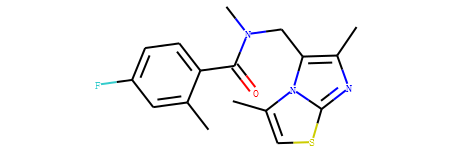

In [106]:
m2

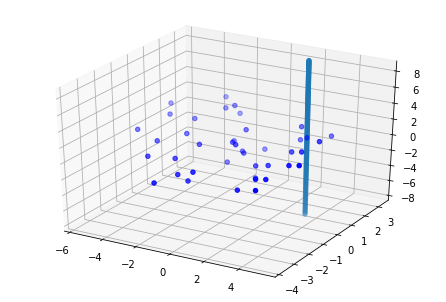

In [107]:
from mpl_toolkits.mplot3d import Axes3D
vec=dot_vec(9,p,m2)
x, y, z = vec[:,0], vec[:,1], vec[:,2]
px, py, pz = p[:,0], p[:,1], p[:,2]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.scatter(px, py, pz,c='b')

In [151]:
def calc_CRIvec(idx,m):
    c = atom_charges(m)
    p = atom_pos(m)
    vec = dot_vec(idx,p,m)
    CRIvec = np.zeros((2,128))
    j=0
    for v in vec:
        efield = np.zeros(3)
        gfield = np.zeros(3)
        for i,ci in enumerate(c):
            d_vec = p[i] -v
            d_s = np.sum(np.square(d_vec))
            d_nvec = d_vec/np.linalg.norm(d_vec)
            efield += d_nvec*ci/d_s
            a = m2.GetAtomWithIdx(i)
            gfield += d_nvec*a.GetMass()/d_s
        CRIvec[0,j]= np.log(np.linalg.norm(efield))
        CRIvec[1,j]= np.log(np.linalg.norm(gfield))
        j += 1
    return CRIvec

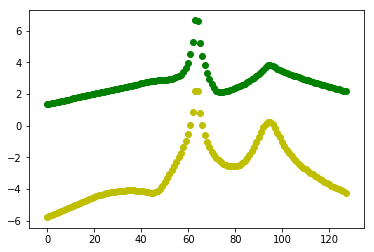

In [162]:
c_g = calc_CRIvec(4,m2)
plt.scatter(range(128),c_g[1,:],c='g')
plt.scatter(range(128),c_g[0,:],c='y')